# Means testing

Testing for the difference in means of two samples



In [131]:
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import scipy.stats as st

In [132]:
mu, variance = (0,1)
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)



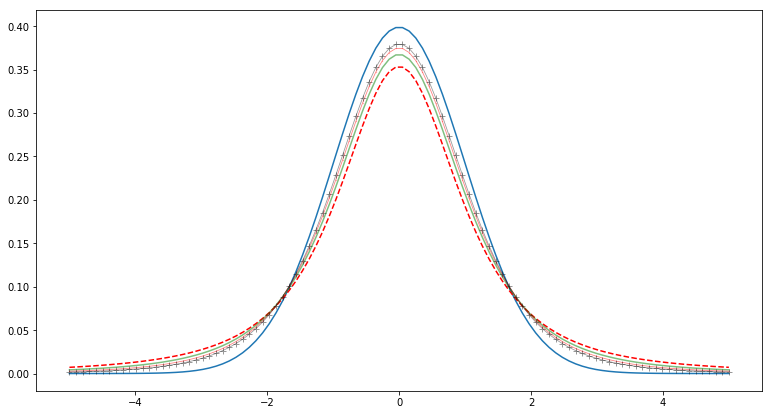

In [48]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(13,7)
ax.plot(x,mlab.normpdf(x, mu, sigma))
ax.plot(x,st.t.pdf(x,2),'r--')
ax.plot(x,st.t.pdf(x,3),color='green',alpha=0.5)
ax.plot(x,st.t.pdf(x,4),color='red',alpha=0.5,lw=0.8,marker='.',ms=0.5)
ax.plot(x,st.t.pdf(x,5),color='black',alpha=0.4,lw=0.8,marker='+')

In [133]:
np.random.seed(53997)
a1 = np.random.normal(8,1.5,15)
a2 = np.random.normal(10,2,20)
min(np.union1d(a1,a2))
max(np.union1d(a1,a2))
x = np.linspace(min(np.union1d(a1,a2)),max(np.union1d(a1,a2)), 100)
a1Kde = gaussian_kde( a1 )
a2Kde = gaussian_kde( a2 )



<function matplotlib.pyplot.show>

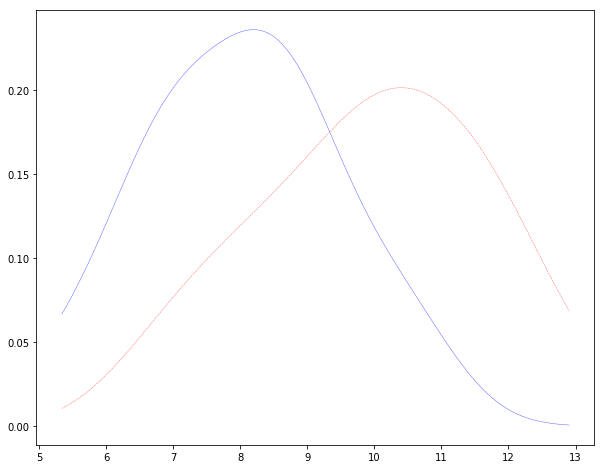

In [134]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,8)
ax.plot(x, a1Kde(x), 'b-', lw=0.5, alpha=0.6)
ax.plot(x, a2Kde(x), 'r--', lw=0.5, alpha=0.6)
plt.show

In [135]:
print("Mean of a1 is:      %6.4f" % (a1.mean()))
print("Mean of a1 is:      %6.4f" % (a2.mean()))
print("Mean difference is: %6.4f" % (abs(a1.mean()-a2.mean())) )

Mean of a1 is:      8.0241
Mean of a1 is:      9.9477
Mean difference is: 1.9235


{'boxes': [<matplotlib.lines.Line2D at 0x19366270>,
 'caps': [<matplotlib.lines.Line2D at 0x193669f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19366ff0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x19366f50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x193664f0>,
  <matplotlib.lines.Line2D at 0x19366ef0>]}

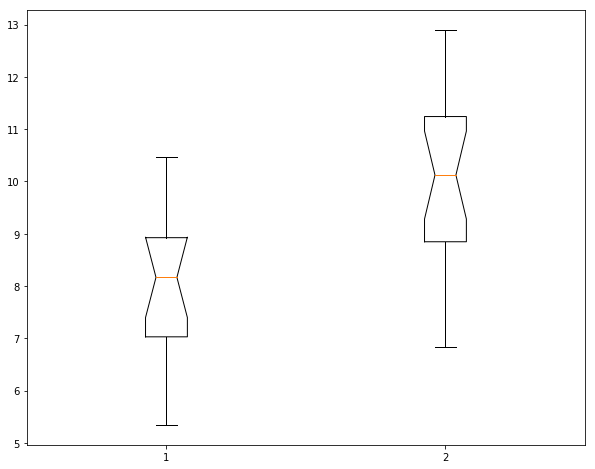

In [49]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,8)
data = [a1,a2]
ax.boxplot(data,1,'gD')

# T-test

Our data (each distribution) are:  
- Sort of mound like  
- unimodal  
- not quite symmetric  

Are not:  
- homoskedastic  
  - do not have equal variance


## T-test

$\huge t=\frac{\bar{X_{a1}} -\bar{X_{a2}} }{ S_{\bar{X_{a1}}-\bar{X_{a2} }}*\sqrt{ \frac{1}{n_{a1}}+ \frac{1}{n_{a2}} } }  $   
  
<br>   
$\huge S_{\bar{X_{a1}}-\bar{X_{a2}}} = \sqrt{\frac{ (n_{a1}-1) \times s_{a1}^2 +  (n_{a2}-1) \times s_{a2}^2}{ n_{a1} + n_{a2}-2}} $
   
   
<br>   
<br>      
$Term1 = \frac{ (n_{a1}-1) \times s_{a1}^2 +  (n_{a2}-1) \times s_{a2}^2}{ n_{a1}+n_{a2}-2}$  
  
<p>  
$Term2 = \sqrt{ \frac{ 1}{n_{a1}}+ \frac{1}{ n_{a1} } }$

In [138]:
# Let us compute the relevant statistics "long-hand"
# Want mean & variance of each
#stats=dict()
statsA1=dict()
statsA2=dict()

na1=len(a1)
na2=len(a2)

term1 = ( (na1-1)*a1.var()+(na2-1)*a2.var())/( na1+na2-2 )
term2 = math.sqrt((1/na1)+(1/na2))
                        
#sPool=math.sqrt( term1 *term2 ) 
sPool=math.sqrt( term1 ) 
t=(a1.mean() - a2.mean())/ ( sPool * term2)

print("t is:       %6.4f" % (t))
print("P for t is: %8.6f" % (st.t.cdf(t,(na1+na2-2))) )

t is:       -3.6615
P for t is: 0.000435


In [95]:
# use ttest_ind for independent samples
# third argument (0) is the axis along a1 and a2 to use
eq=st.ttest_ind(a1,a2) 
uneq=st.ttest_ind(a1,a2,equal_var=False)

print("Python statistics, equal variance:\nt:     %6.4f\nP:      %8.6f\n\n" %( eq[0],eq[1] ) )
print("Python statistics, unequal variance:\nt:     %6.4f\nP:      %8.6f\n\n" %( uneq[0], uneq[1] ) )

Python statistics, equal variance:
t:     -3.5579
P:      0.001157


Python statistics, unequal variance:
t:     -3.6447
P:      0.000927




## Overlap of 2 distributions

For 2 distributions with:  
- means that differ,  (&mu;<sub>1</sub> &ne; &mu;<sub>2</sub>)  
- equal variance,  (s<sub>1</sub> = s<sub>2</sub>)  
- equal n=15, (n<sub>1</sub> = n<sub>2</sub>)  

In [144]:
lower=3
upper=15
x = np.linspace(lower,upper, 200)
df     = 14
loc1   = 8
loc2   = 10
alpha  = 0.05
beta   = 0.2
t_crit1 = st.t.isf(alpha, 14)    # t.crit for 5% one-sided
t_crit2 = st.t.isf(beta,  14)    # t.crit for 20% one-sided

mean, var, skew, kurt = st.t.stats(df, moments='mvsk')
sd=np.sqrt(var)
vlin1  = loc1 + t_crit1*sd
alpha = 0.05
beta_1  = st.t.cdf(vlin1,loc=10,df=df)

<function matplotlib.pyplot.show>

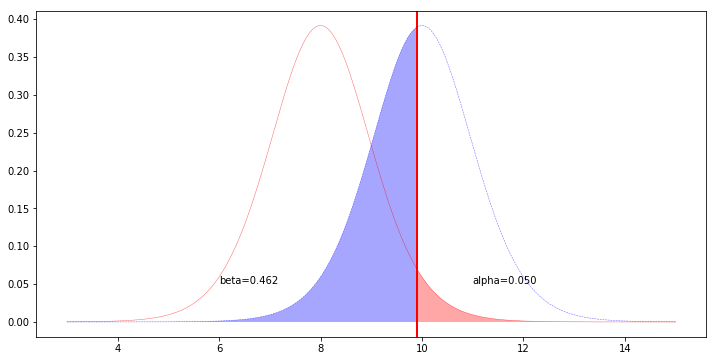

In [145]:
plt.rcParams["figure.figsize"]=(12,6)

plt.axvline(x=vlin1,color='r',lw=2)
plt.fill_between(x=np.arange(vlin1,upper,0.01),
               y1=st.t.pdf(np.arange(vlin1,upper,0.01),df=df, loc=loc1),
               facecolor='red',
               alpha=0.35)
plt.fill_between(x=np.arange(lower,vlin1,0.01),
               y1=st.t.pdf(np.arange(lower,vlin1,0.01),df=df, loc=loc2),
               facecolor='blue',
               alpha=0.35)
plt.plot(x, st.t.pdf( x,loc=loc1, df=df ), 'r-',  lw=0.5, alpha=0.6)
plt.plot(x, st.t.pdf( x,loc=loc2, df=df ), 'b--', lw=0.5, alpha=0.6)
plt.text(x=11, y=0.05, s="alpha=%5.3f" % (alpha) )
plt.text(x=6,  y=0.05, s="beta=%5.3f" % (beta_1) )
plt.show

In [121]:
t_crit2*sd
vlin1+ t_crit2*sd
t_crit2
sd

1.0801234497346435

In [148]:
x      = np.linspace(0,18, 200)
loc2   = vlin1 + t_crit2*sd
alpha  = 0.05
beta   = st.t.cdf(vlin1,loc=loc2,df=df)
beta
loc2
eff_s=(loc2-loc1)/sd
eff_s


2.6293649173322766

<function matplotlib.pyplot.show>

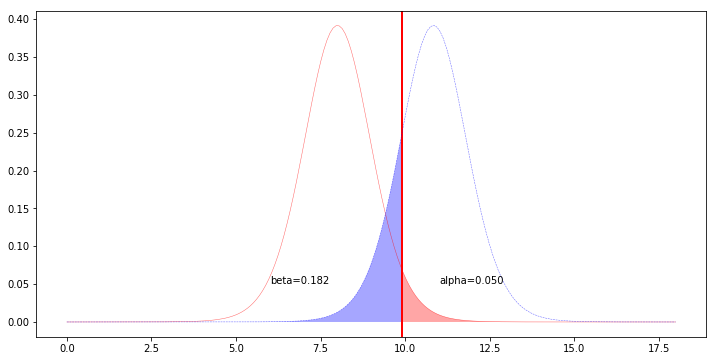

In [149]:
plt.rcParams["figure.figsize"]=(12,6)

plt.axvline(x=vlin1,color='r',lw=2)
plt.fill_between(x=np.arange(vlin1,upper,0.01),
               y1=st.t.pdf(np.arange(vlin1,upper,0.01),df=df, loc=loc1),
               facecolor='red',
               alpha=0.35)
plt.fill_between(x=np.arange(lower,vlin1,0.01),
               y1=st.t.pdf(np.arange(lower,vlin1,0.01),df=df, loc=loc2),
               facecolor='blue',
               alpha=0.35)
plt.plot(x, st.t.pdf( x,loc=loc1, df=df ), 'r-',  lw=0.5, alpha=0.6)
plt.plot(x, st.t.pdf( x,loc=loc2, df=df ), 'b--', lw=0.5, alpha=0.6)
plt.text(x=11, y=0.05, s="alpha=%5.3f" % (0.05) )
plt.text(x=6,  y=0.05, s="beta=%5.3f" % (beta) )
plt.show

## t-test with 80% power

For a two sample test with 15 per group
To have 80% power we need:  
- &mu;<sub>0</sub> = 8  
- &mu;<sub>1</sub> = 11  

Or and effect size \[ (&mu;<sub>1</sub> - &mu;<sub>0</sub> / sd) \] of:  
- 2.82